In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.optimize import differential_evolution
from pylab import genfromtxt;
# %matplotlib notebook
%matplotlib inline
# import torch

In [2]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

In [117]:
H=np.arange(-50, 240,0.1)
A=np.zeros((len(H),len(H)))
sig=0.2
for i, h in enumerate(H):
    A[i]=gauss(H, 1, h, sig)
print  A.shape[1]

2900


<IPython.core.display.Javascript object>


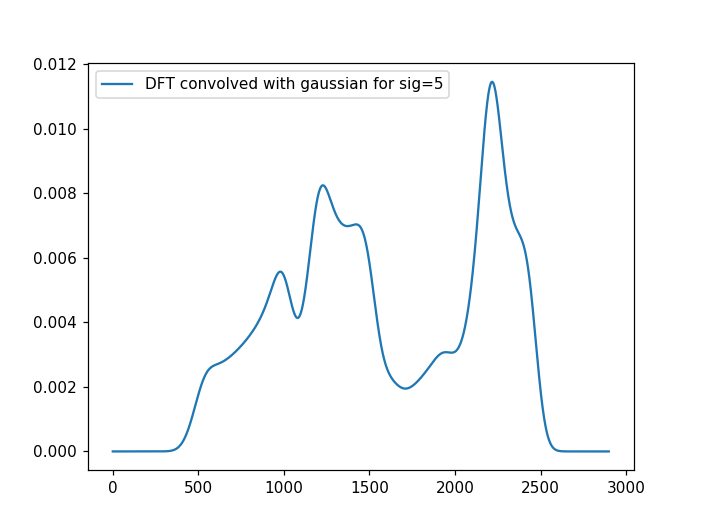

In [118]:
plt.figure()
plt.plot(lines, label='DFT convolved with gaussian for sig=5')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


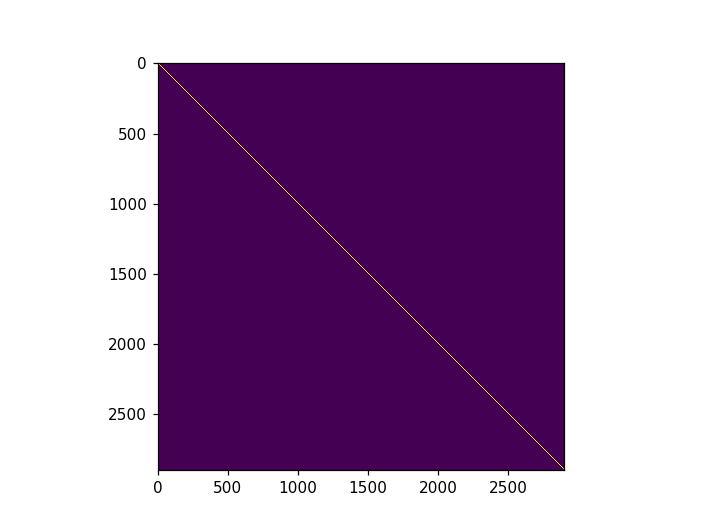

In [119]:
plt.figure()
plt.imshow(A)
plt.show()

In [120]:
np.matmul(A, A[1450]).shape

(2900,)

<IPython.core.display.Javascript object>


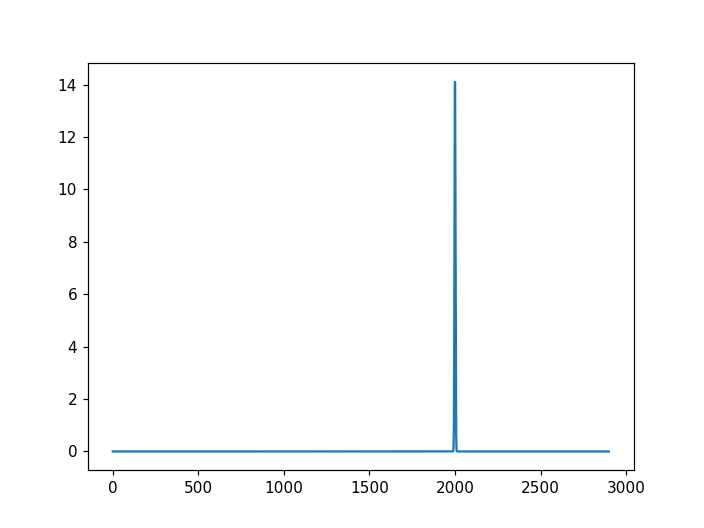

In [121]:
plt.figure()
plt.plot(np.matmul(A, A[2000]))

In [122]:
# A=lines1[:,2]
# A = np.loadtxt("RF3_save.txt")
# A=A[0:2600,:]
# A=
# E = np.zeros((Nx,1))
f = np.zeros((Nx,1))
# E[:,0] = lines[:,0]

# f[:,0] = lines[:,1]

f[:,0] = lines

In [123]:
# print len(A)
# print len(f)

# plt.figure()
# plt.plot(H,A)
# plt.show()

In [124]:
C_spa = np.ones(m_spa+1)
print C_spa

[ 1.  1.]


In [125]:
for j in range(0, m_spa+1):
    for js in range(0, m_spa+1):
        if js != j:
            C_spa[j] = C_spa[j]/(j-js)
print C_spa

[-1.  1.]


In [126]:
L_SPA = np.zeros((Nx,Nx))
print L_SPA

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [127]:
m2 = int(np.floor((m_spa+1)/2))
q_norm = np.sum(C_spa[0:m2]);
C_spa = C_spa/q_norm
print C_spa

[ 1. -1.]


In [128]:
for j in range(0,Nx):
#     print j
    inds = range(j-m2,j+m_spa-m2+1)
#     print inds
    for jp in range(0,m_spa+1):
            if inds[jp]<0:
                inds[jp] = inds[jp]+Nx
            if inds[jp]>Nx-1 :
                inds[jp] = inds[jp]-Nx

    L_SPA[j,inds] = C_spa
print L_SPA[0]

[-1.  0.  0. ...,  0.  0.  1.]


In [129]:
# L_SPA_Grad = np.convolve(np.transpose(L_SPA[0]),L_SPA[0], 'same')

In [130]:
L_SPA_Grad = np.matmul(np.transpose(L_SPA),L_SPA)

In [131]:
print L_SPA_Grad

[[ 2. -1.  0. ...,  0.  0. -1.]
 [-1.  2. -1. ...,  0.  0.  0.]
 [ 0. -1.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  2. -1.  0.]
 [ 0.  0.  0. ..., -1.  2. -1.]
 [-1.  0.  0. ...,  0. -1.  2.]]


In [132]:
# plt.figure()
# # plt.plot(L_SPA_Grad)
# plt.plot(L_SPA_Grad_M[100])
# plt.show()

In [133]:
A_T = np.transpose(A)

uk = np.zeros((Nx,1))
dk_x = np.zeros((Nx,1))
bk_x = dk_x
dk_g = dk_x
bk_g = dk_x
fk = f
p_lambda = np.zeros((Nx,1))
p_lambda[:,0] = np.linspace(p_lambda_start, p_lambda_end,Nx)
p_gamma = np.zeros((Nx,1))
p_gamma[:,0]= np.linspace(p_gamma_start, p_gamma_end,Nx)

In [134]:
print p_lambda

[[ 500.]
 [ 500.]
 [ 500.]
 ..., 
 [ 500.]
 [ 500.]
 [ 500.]]


In [135]:
print uk.shape, uk[:-1].shape, A.shape

(2900, 1) (2899, 1) (2900, 2900)


In [136]:
for jit in range(0,nits):
    ukp = uk
    ifkt = np.matmul(A_T,fk)
    rhs = mu*ifkt+p_lambda*np.matmul(L_SPA,(dk_x-bk_x))+p_gamma*(dk_g-bk_g)
    ruk = np.matmul(A,uk)
    iukt = np.matmul(A_T,ruk)
    r=rhs-mu*iukt-p_lambda*np.matmul(L_SPA_Grad,uk)-p_gamma*uk
    p=r
    rsold=np.matmul(np.transpose(r),r)
    for jcg in range(0,max_cg):
        rp = np.matmul(A,p)
        irpt = np.matmul(A_T,rp)
        Ap=mu*irpt+p_lambda*np.matmul(L_SPA_Grad,p)+p_gamma*p
        alpha=rsold/np.matmul(np.transpose(p),Ap)
        uk=uk+alpha*p
        r=r-alpha*Ap
        rsnew=np.matmul(np.transpose(r),r)
        if rsnew < 1e-8:
            break

        p=r+rsnew/rsold*p
        rsold=rsnew

    sk_x = np.matmul(L_SPA,uk)+bk_x
    dk_x = np.maximum(np.abs(sk_x)-1.0/p_lambda,0.0)*np.sign(sk_x)
    bk_x = sk_x-dk_x
    sk_g = uk+bk_g
    dk_g = np.maximum(np.abs(sk_g)-1.0/p_gamma,0.0)*np.sign(sk_g)
    bk_g = sk_g-dk_g


    fk = fk+f-np.matmul(A,uk)
fk = fk+f-np.matmul(A,uk) 

<IPython.core.display.Javascript object>


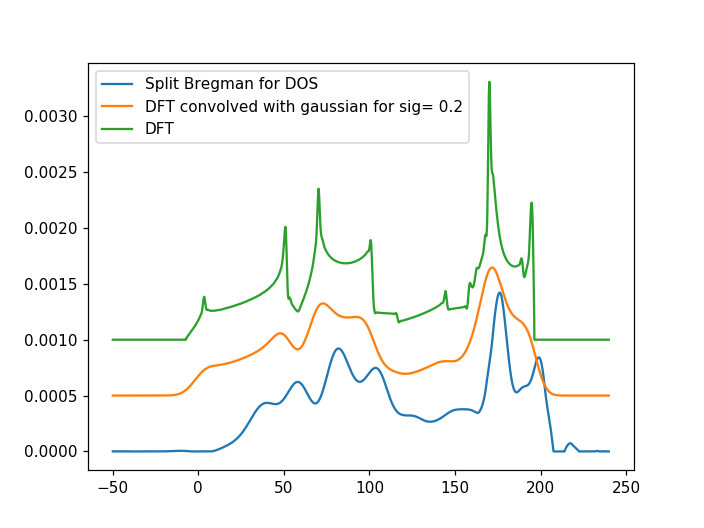

<function matplotlib.pyplot.show>

In [137]:
D_Breg=genfromtxt('Bregman Reconstructed DFT(E,I).dat')
Breg=D_Breg[:,1]
Breg=Breg/np.sum(Breg)
E_Breg=D_Breg[:,0]
Ei=genfromtxt('Bregman_split_300(E,uk).dat')
Ei=genfromtxt('Bregman_split_300(E,uk).dat')
E=Ei[:,0]
lambda_vary=np.arrange=([5000])
plt.figure('Bregman_split_300(E,uk).dat')
for i in lambda_vary:
    R=genfromtxt("bregman_split_lambda {}_(recons, residual_vec).dat".format(i))
    R=R[:,0]
    R[R<0]=0
    R=R/np.sum(R)
#     plt.plot(DFT_E,R, label='Split Bregman lambda {}'.format(i))
    plt.plot(DFT_E,R, label='Split Bregman for DOS')
#     plt.plot(H,uk+0.0005, label='reconstructed DFT with gaussian RF for sig= {}'.format(sig))
    plt.plot(H,lines/np.sum(lines)+0.0005, label='DFT convolved with gaussian for sig= {}'.format(sig))
#     plt.plot(DFT_E,Breg+0.0005, label='BREGMAN')
    plt.plot(DFT_E,DFT_I+0.001, label='DFT')
    plt.legend()
#     plt.ylim(0,0.002)
#     plt.figtext(0.68,0.70,'mu {}\ngamma_start {}\ngamma_end {}\nnits {}\nmax_cg {}\norder of deriv {}'.format (mu,p_gamma_start,p_gamma_end,nits,max_cg,m_spa))
plt.show

<IPython.core.display.Javascript object>


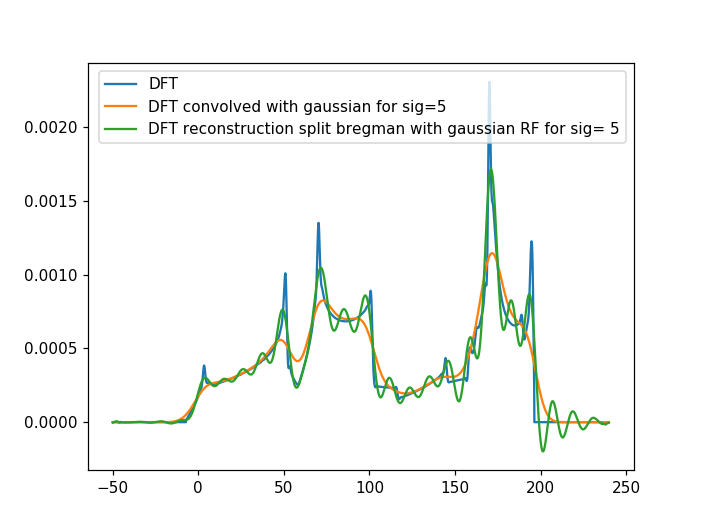

In [33]:
plt.figure()
plt.plot(DFT_E, DFT_I, label='DFT')
plt.plot(H,lines/np.sum(lines), label='DFT convolved with gaussian for sig=5')
plt.plot(H,uk, label='DFT reconstruction split bregman with gaussian RF for sig= 5')
plt.legend()
plt.show()

In [32]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

In [34]:
x =np.arange(-50,240,0.1)                                         
sig= gauss(x,1,0,5)

print sig

[  1.53891973e-23   1.87926491e-23   2.29396255e-23 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [35]:
mu=5.0
# p_lambda_start = 0.001#1e-4
# p_lambda_end= p_lambda_start #1e-2
p_gamma_start = 1e-4
p_gamma_end= p_gamma_start#1e-2
nits=4.0
max_cg = 50.0
m_spa  = 1

# lambda_vary=np.arrange=([0.001, 0.0001, 1,5,10,20,50,70,100,200,300,500,1000,5000])
# lambda_vary=np.arrange=([0.001,20,200,1000,5000])
lambda_vary=np.arrange=([1000])

In [36]:
DFT=genfromtxt('extended DFT (E,DFT).dat')
DFT_I=DFT[:,1]
DFT_I=DFT_I/np.sum(DFT_I)
DFT_E=DFT[:,0]

In [46]:
#Convolved DFT with gaussian
Con_DFT_gausian=np.convolve(DFT_I, sig, 'full')

<IPython.core.display.Javascript object>


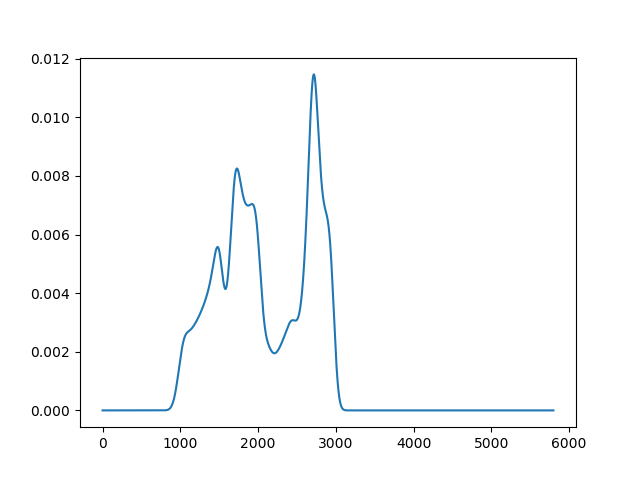

In [47]:
plt.figure()
plt.plot(Con_DFT_gausian)

2900
2900


<IPython.core.display.Javascript object>


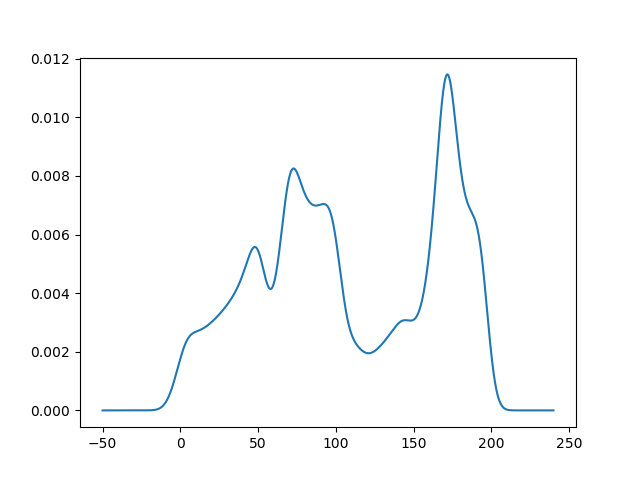

In [55]:
Con_DFT_gausian1=Con_DFT_gausian[500:500+len(sig)]
print len(Con_DFT_gausian1)
print len(sig)
plt.figure()
plt.plot(DFT_E,Con_DFT_gausian1)

In [57]:
np.savetxt('Gaussian Convolved DFT(E,I,GaussianRF).dat', np.c_[DFT_E,Con_DFT_gausian1,sig])

<IPython.core.display.Javascript object>


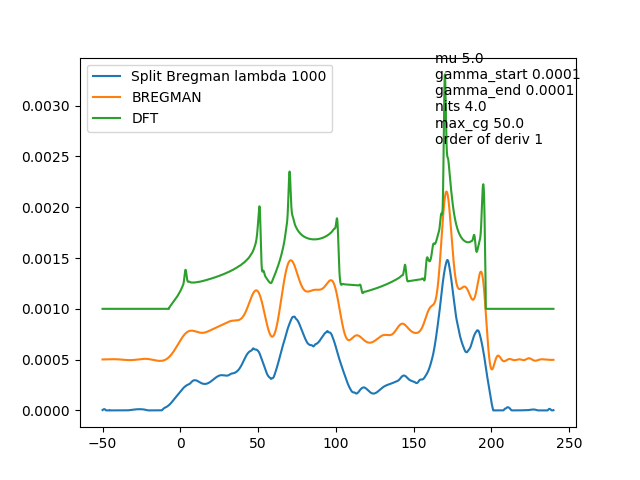

<function matplotlib.pyplot.show>

In [77]:
# D_Breg=genfromtxt('Deconvolvd_300_Bregman.dat')
D_Breg=genfromtxt('Bregman Reconstructed DFT(E,I).dat')
Breg=D_Breg[:,1]
Breg=Breg/np.sum(Breg)
E_Breg=D_Breg[:,0]
Ei=genfromtxt('Bregman_split_300(E,uk).dat')
Ei=genfromtxt('Bregman_split_300(E,uk).dat')
E=Ei[:,0]
plt.figure('Bregman_split_300(E,uk).dat')
for i in lambda_vary:
    R=genfromtxt("DFT_bregman_split_lambda {}_(recons, residual_vec).dat".format(i))
    R=R[:,0]
    R[R<0]=0
    R=R/np.sum(R)
    plt.plot(DFT_E,R, label='Split Bregman lambda {}'.format(i))
    plt.plot(DFT_E,Breg+0.0005, label='BREGMAN')
    plt.plot(DFT_E,DFT_I+0.001, label='DFT')
    plt.legend()
#     plt.ylim(0,0.002)
    plt.figtext(0.68,0.70,'mu {}\ngamma_start {}\ngamma_end {}\nnits {}\nmax_cg {}\norder of deriv {}'.format (mu,p_gamma_start,p_gamma_end,nits,max_cg,m_spa))
plt.show

In [1]:
RF3_read = genfromtxt("RF3_save.txt")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Reading the Resolution Function (RF calculated for Ei=300) files 

In [2]:
RF3_read = genfromtxt("RF3_save.txt")


# plotting the saved RF 

<IPython.core.display.Javascript object>


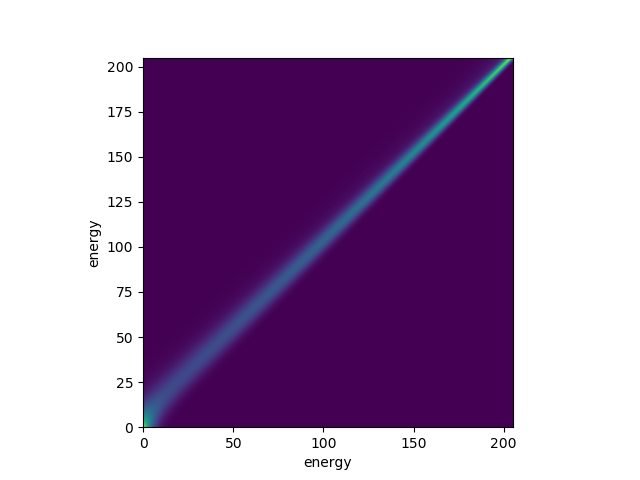

In [3]:
plt.figure('2D RF')
plt.imshow(RF3_read[::-1], extent=[0, 205, 0,205])
plt.xlabel('energy')
plt.ylabel('energy')
plt.show()

# Reading  saved DFT file 

<IPython.core.display.Javascript object>


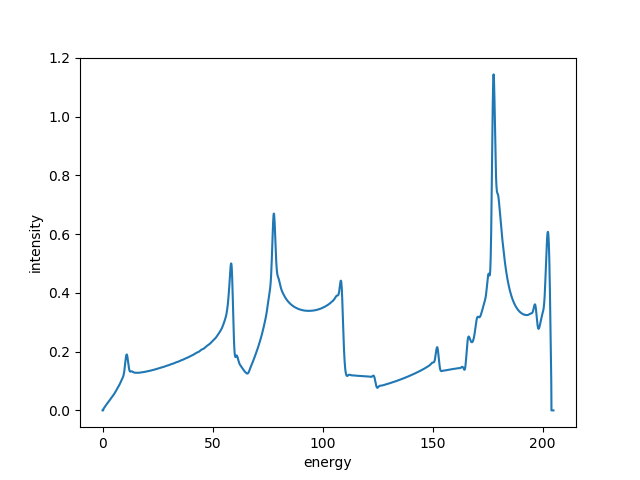

In [4]:
read_DFT = genfromtxt("DFT.dat")
read_DFT_x=read_DFT[:,0]

read_DFT_y=read_DFT[:,1]

plt.figure('original DFT')
plt.plot(read_DFT_x,read_DFT_y)
plt.xlabel('energy')
plt.ylabel('intensity')
plt.show()

# convolution of the DFT with RF_300

<IPython.core.display.Javascript object>


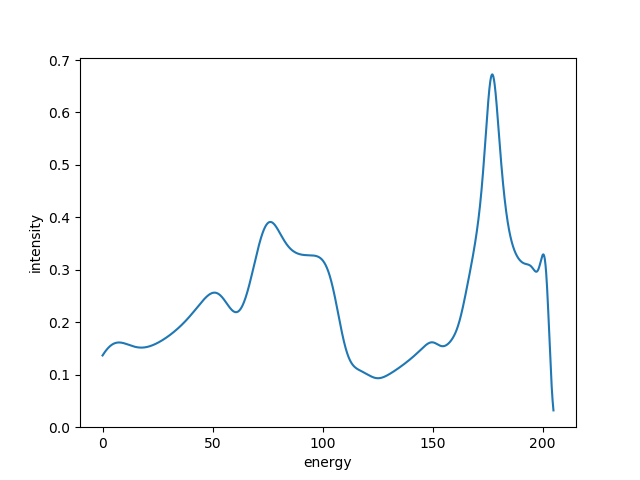

In [5]:
convolve_DFT=F.convolve_NS (read_DFT_y, RF3_read)
plt.figure('convolved DFT')
plt.plot(read_DFT_x, convolve_DFT)
plt.xlabel('energy')
plt.ylabel('intensity')
plt.show()

# Adding the noise to the convolved_DFT_300

<IPython.core.display.Javascript object>


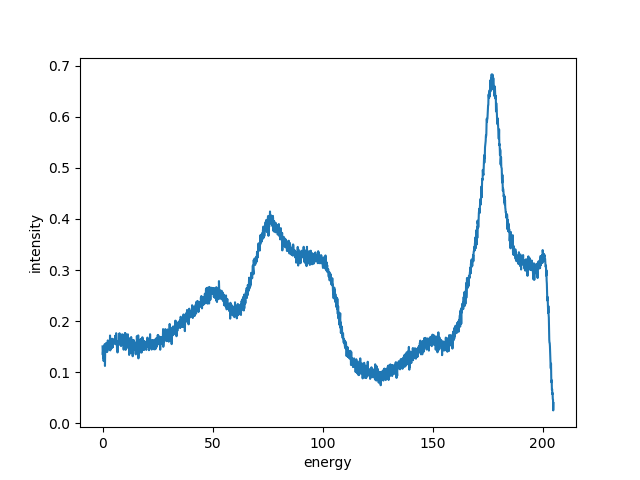

In [6]:
noisyConvolve_DFT=convolve_DFT+ 0.008 * np.random.normal(size=len(convolve_DFT))

plt.figure('noisy convolved DFT')
plt.plot(read_DFT_x, noisyConvolve_DFT)
plt.xlabel('energy')
plt.ylabel('intensity')
plt.show()

In [7]:
np.savetxt('Convolved and noisy DFT.dat', np.c_[convolve_DFT,noisyConvolve_DFT])

# Deconvolved the noisy_convolved_DFT to reconstruct the original DFT

<IPython.core.display.Javascript object>


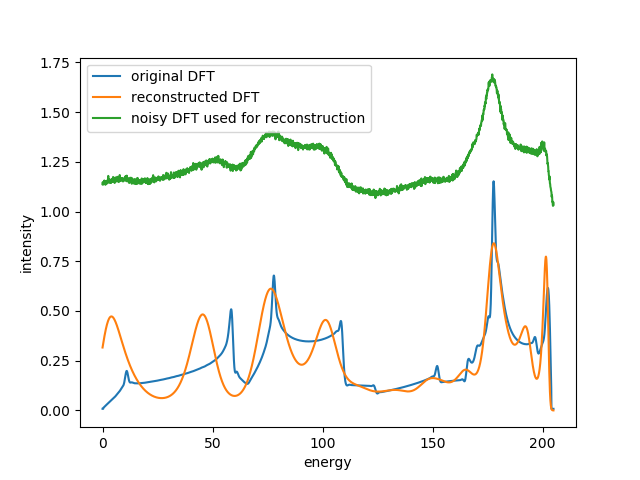

In [8]:
ini3=(np.sum(noisyConvolve_DFT,0)/len(noisyConvolve_DFT)) * np.ones(len(noisyConvolve_DFT))#initial guess
   
deconvolved_DFT,error=F.deconvolve_NS(noisyConvolve_DFT,RF3_read,ini3,'iteration',10)
deconvolved_DFT[deconvolved_DFT<0]=0
deconvolved_DFT[deconvolved_DFT>1.75]=0

plt.figure('Result')
plt.plot(read_DFT_x,read_DFT_y+0.008, label='original DFT')
plt.plot(read_DFT_x, deconvolved_DFT, label='reconstructed DFT')
plt.plot (read_DFT_x, noisyConvolve_DFT+1, label='noisy DFT used for reconstruction')
plt.xlabel('energy')
plt.ylabel('intensity')
plt.legend()
plt.show()

# Error calculation

<IPython.core.display.Javascript object>


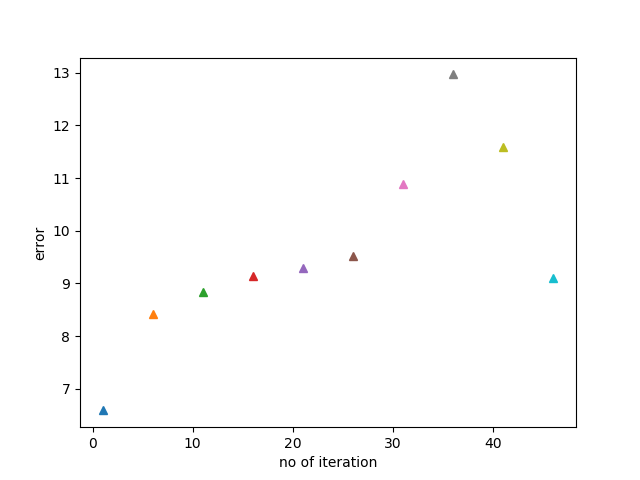

In [10]:
no_iteration=np.arange(1,50,5)
plt.figure('Error')
for i in no_iteration:  
    
    output=F.deconvolve_NS(noisyConvolve_DFT,RF3_read,ini3,'iteration',i)
    
    convolve_output=F.convolve_NS(output,RF3_read)+0.008 * np.random.normal(size=len(convolve_DFT))
    
    residual_sum=np.sqrt((np.sum(( noisyConvolve_DFT-convolve_output)**2))/len(convolve_output)) 
    plt.plot( i, residual_sum, '^' )
plt.xlabel('no of iteration')
plt.ylabel('error')
plt.show()